In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("SampleData.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


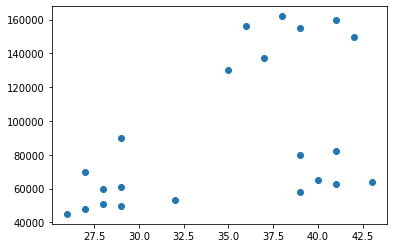

In [3]:
plt.scatter(data['Age'],data['Income($)'])
plt.show()

# K-Means Model Creation and Training

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
data['Cluster'] = y_predicted
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

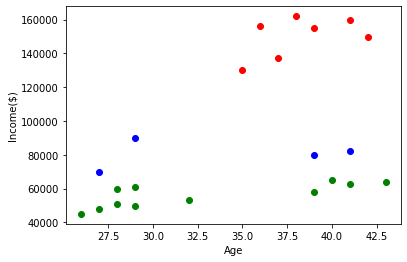

In [8]:
data1 = data[data.Cluster==0]
data2 = data[data.Cluster==1]
data3 = data[data.Cluster==2]

plt.scatter(data1.Age,data1['Income($)'], color='green')
plt.scatter(data2.Age,data2['Income($)'], color='red')
plt.scatter(data3.Age,data3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

# Using MinMax Scaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [11]:
data['Cluster'] = y_predicted
data.drop('Cluster',axis='columns',inplace=True)
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [12]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.1685851223602976,
 0.1327661931978319,
 0.10995816883086573]

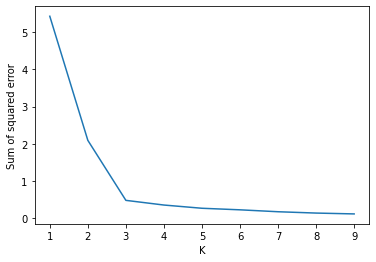

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)